<a href="https://colab.research.google.com/github/rechavar/pyCovid_TechLabsProj/blob/Phillip/TechLabs_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TechLabs final project 
## (Problem 2 - Group 8)

---

This notebook represents the work in the final project of the Techlabs #codeathome course.
<br> <br>
Team members: Luca Wulfert, Laura Laks, Phillip Guske, Juliana Bedoya, Alejandro Echavarria and Marco Stoever

---

### libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Constants

In [0]:
confirmed_csv_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
death_csv_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
recovered_csv_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

### Data Exploration

---
GitHub repository: https://github.com/CSSEGISandData/COVID-19 
<br>
(c) Johns Hopkins University Center for Systems Science and Engineering <br> <br>
The datasets were also used by Kaggle for their weekly *COVID19 Global Forecasting* competition. <br>
(e.g. see: https://www.kaggle.com/c/covid19-global-forecasting-week-5)


---







In [0]:
df_confirmed = pd.read_csv(confirmed_csv_url)
df_death = pd.read_csv(death_csv_url)
df_recovered = pd.read_csv(recovered_csv_url)

In [4]:
df_confirmed.head()

Province/State Country/Region      Lat  ...  5/15/20  5/16/20  5/17/20
0            NaN    Afghanistan  33.0000  ...     6053     6402     6664
1            NaN        Albania  41.1533  ...      916      933      946
2            NaN        Algeria  28.0339  ...     6629     6821     7019
3            NaN        Andorra  42.5063  ...      761      761      761
4            NaN         Angola -11.2027  ...       48       48       48

[5 rows x 121 columns]

In [5]:
df_death.head()

Province/State Country/Region      Lat  ...  5/15/20  5/16/20  5/17/20
0            NaN    Afghanistan  33.0000  ...      153      168      169
1            NaN        Albania  41.1533  ...       31       31       31
2            NaN        Algeria  28.0339  ...      536      542      548
3            NaN        Andorra  42.5063  ...       49       51       51
4            NaN         Angola -11.2027  ...        2        2        2

[5 rows x 121 columns]

In [6]:
df_recovered.head()

Province/State Country/Region      Lat  ...  5/15/20  5/16/20  5/17/20
0            NaN    Afghanistan  33.0000  ...      745      745      778
1            NaN        Albania  41.1533  ...      705      714      715
2            NaN        Algeria  28.0339  ...     3271     3409     3507
3            NaN        Andorra  42.5063  ...      604      615      617
4            NaN         Angola -11.2027  ...       17       17       17

[5 rows x 121 columns]

In [7]:
pd.set_option('display.max_rows', 300)

print(df_confirmed.iloc[:,1:2])
print(df_death.iloc[:,1:2])
print(df_recovered.iloc[:,1:2])

#Taiwan is written with an asterisk (*) at the end, we have to change this:
#We also want to have "USA" instead of "US":
#Congo (Brazzaville) and Congo (Kinshasa) are capitals of different countries!
#Brazzaville -> Republic of the Congo || Kinshasa -> Democratic Republic of the Congo

#We will change this in the data cleaning part

                       Country/Region
0                         Afghanistan
1                             Albania
2                             Algeria
3                             Andorra
4                              Angola
5                 Antigua and Barbuda
6                           Argentina
7                             Armenia
8                           Australia
9                           Australia
10                          Australia
11                          Australia
12                          Australia
13                          Australia
14                          Australia
15                          Australia
16                            Austria
17                         Azerbaijan
18                            Bahamas
19                            Bahrain
20                         Bangladesh
21                           Barbados
22                            Belarus
23                            Belgium
24                              Benin
25          

In [0]:
#reset max_rows displayed to default number (10):
pd.set_option('display.max_rows', 10)

### Data Cleaning

In [0]:
all_dataframes = [df_confirmed, df_death, df_recovered]

for df in all_dataframes:
  # Dropping of unnecessary columns
  df.drop(['Province/State', 'Lat', 'Long'], axis = 1, inplace = True)

  #Country renaming:
  df["Country/Region"].replace(["Taiwan*", "US", "Congo (Brazzaville)", "Congo (Kinshasa)"], 
                               ["Taiwan", "USA", "Republic of the Congo", "Democratic Republic of the Congo"],
                               inplace = True)
  #Set new index
  df.set_index('Country/Region', inplace = True)




#I would really like to apply the loop to all the data cleaning steps to make the code a bit shorter
#However, I didn't manage to do this with the last 2 steps below, mainly bc here, we have the "=" sign in the middle
#Maybe you know something?

#Grouping together countries originally split into multiple Provinces/States
#(Australia, Canada, China, Denmark, France, Netherlands, United Kingdom)
df_confirmed = df_confirmed.groupby(by = df_confirmed.index, axis = 0).sum()
df_death = df_death.groupby(by= df_death.index, axis = 0 ).sum()
df_recovered = df_recovered.groupby(by= df_recovered.index, axis = 0).sum()

# Addition of a "global" row
df_confirmed.loc['Global'] = df_confirmed.sum(axis=0)
df_death.loc['Global'] = df_death.sum(axis=0)
df_recovered.loc['Global'] = df_recovered.sum(axis=0)

In [0]:
#changing rows and columns:
df_confirmed.reset_index(inplace=True)
df_death.reset_index(inplace=True)
df_recovered.reset_index(inplace=True)

#Setting the Country/Region variable as column header:
df_confirmed = df_confirmed.transpose()
df_confirmed.rename(columns=df_confirmed.iloc[0], inplace = True)
df_confirmed.drop("Country/Region", inplace=True)

df_death = df_death.transpose()
df_death.rename(columns=df_death.iloc[0], inplace = True)
df_death.drop("Country/Region", inplace=True)

df_recovered = df_recovered.transpose()
df_recovered.rename(columns=df_recovered.iloc[0], inplace = True)
df_recovered.drop("Country/Region", inplace=True)

#Naming the Date index:
df_confirmed.index.rename("Date", inplace= True)
df_death.index.rename("Date", inplace= True)
df_recovered.index.rename("Date", inplace= True)

#Creating a datetime index:
df_confirmed.index = pd.to_datetime(df_confirmed.index)
df_death.index = pd.to_datetime(df_death.index)
df_recovered.index = pd.to_datetime(df_recovered.index)

In [12]:
df_confirmed
#now 186 countries in total + cruise ships "Diamond Princess" & "MS Zaandam" + "Global" count

Afghanistan Albania Algeria Andorra  ... Yemen Zambia Zimbabwe   Global
Date                                            ...                               
2020-01-22           0       0       0       0  ...     0      0        0      555
2020-01-23           0       0       0       0  ...     0      0        0      654
2020-01-24           0       0       0       0  ...     0      0        0      941
2020-01-25           0       0       0       0  ...     0      0        0     1434
2020-01-26           0       0       0       0  ...     0      0        0     2118
...                ...     ...     ...     ...  ...   ...    ...      ...      ...
2020-05-13        5226     880    6253     760  ...    70    446       37  4347018
2020-05-14        5639     898    6442     761  ...    85    654       37  4442163
2020-05-15        6053     916    6629     761  ...   106    654       42  4542347
2020-05-16        6402     933    6821     761  ...   122    679       42  4634068
2020-05-17        6664     946    7019     761  ...   128    753       44  4713620

[117 rows x 189 columns]

### New Dataframe: Active Cases (For later use?)

In [0]:
df_active = df_confirmed.subtract(df_recovered)

### Data Visualization

The country is: Afghanistan


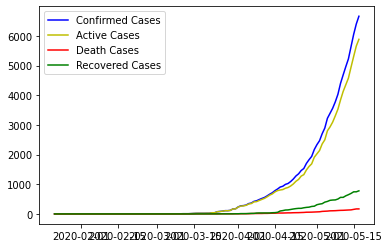

The country is: Albania


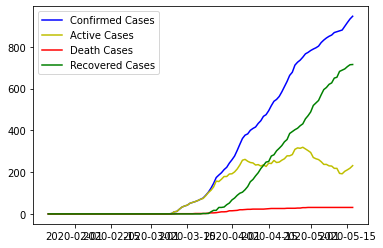

The country is: Algeria


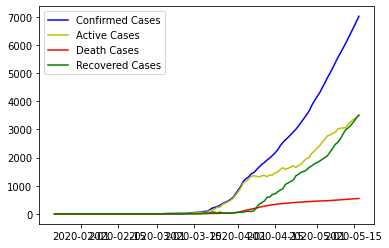

The country is: Andorra


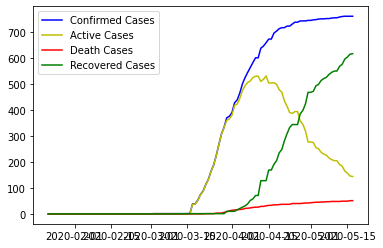

The country is: Angola


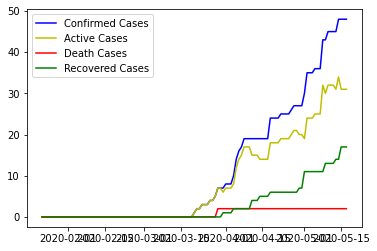

The country is: Antigua and Barbuda


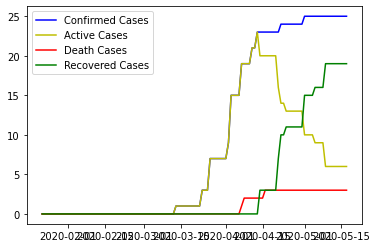

The country is: Argentina


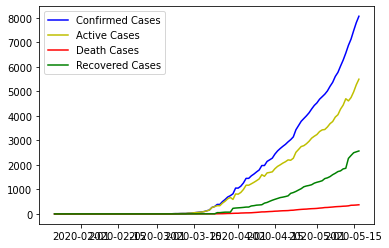

The country is: Armenia


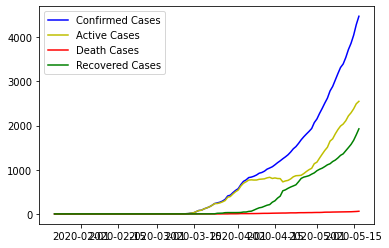

The country is: Australia


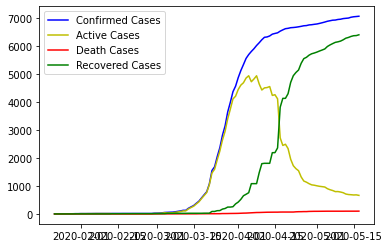

The country is: Austria


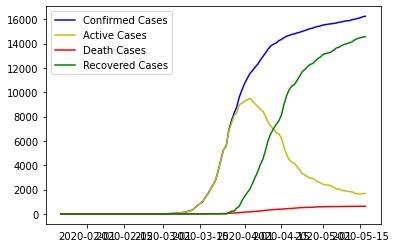

The country is: Azerbaijan


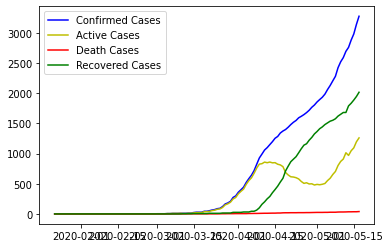

The country is: Bahamas


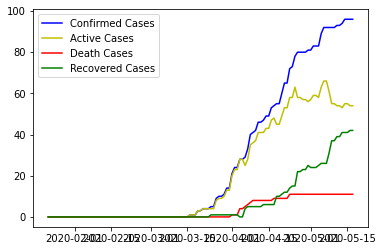

The country is: Bahrain


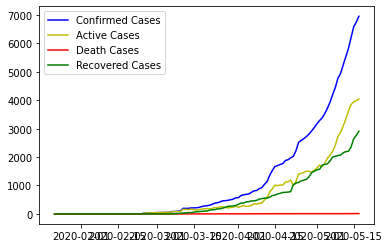

The country is: Bangladesh


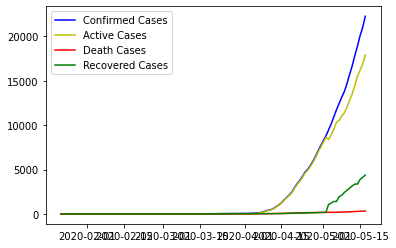

The country is: Barbados


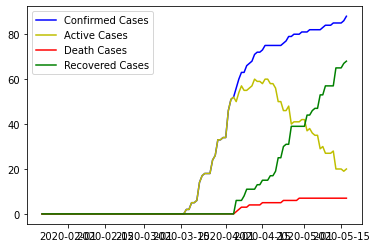

The country is: Belarus


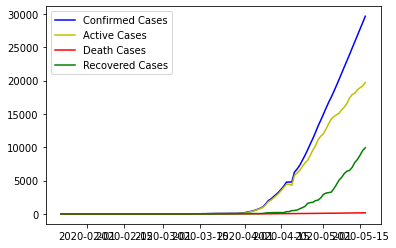

The country is: Belgium


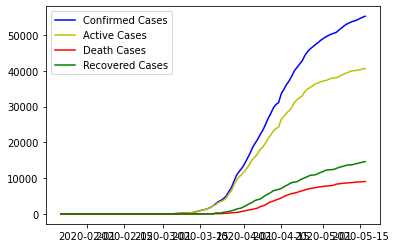

The country is: Belize


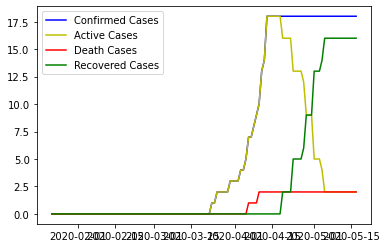

The country is: Benin


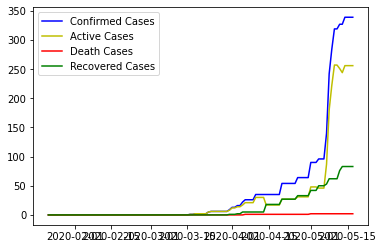

The country is: Bhutan


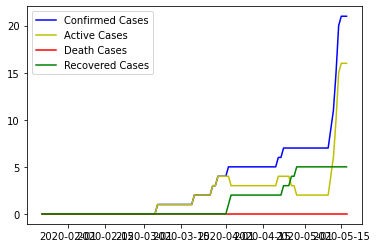

The country is: Bolivia


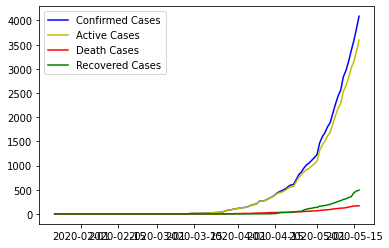

The country is: Bosnia and Herzegovina


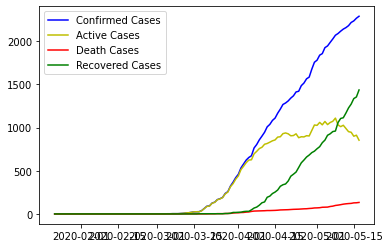

The country is: Botswana


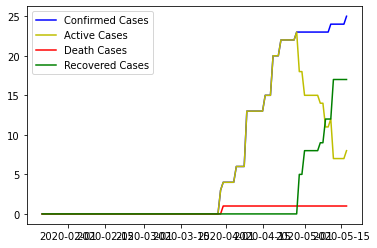

The country is: Brazil


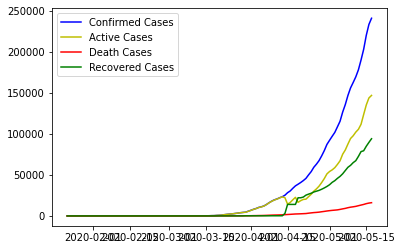

The country is: Brunei


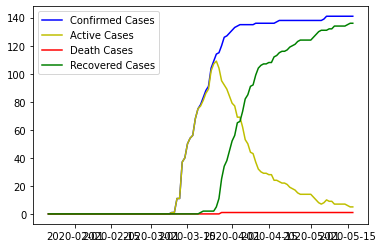

The country is: Bulgaria


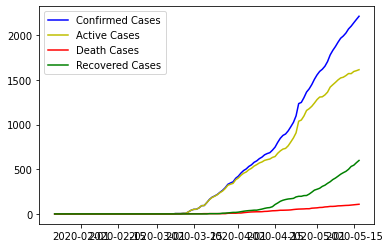

The country is: Burkina Faso


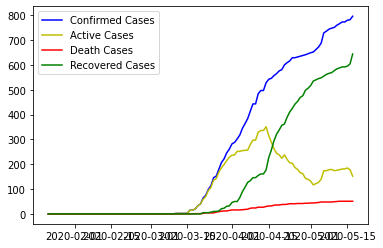

The country is: Burma


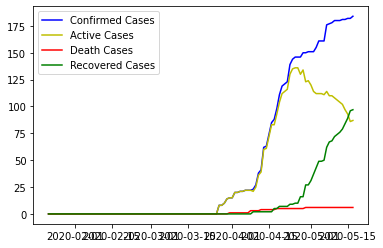

The country is: Burundi


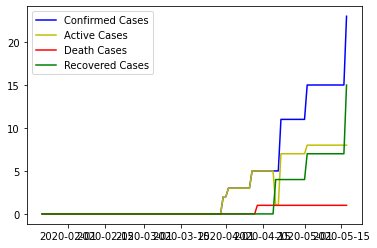

The country is: Cabo Verde


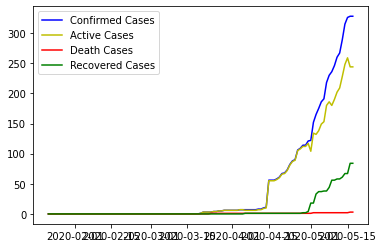

The country is: Cambodia


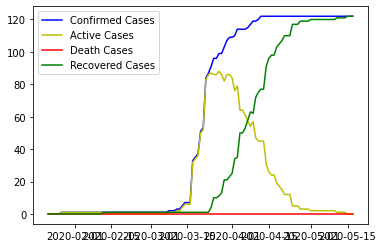

The country is: Cameroon


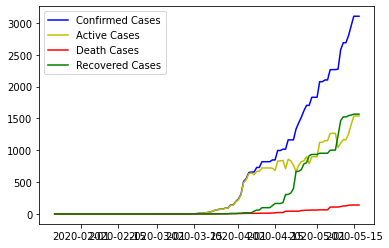

The country is: Canada


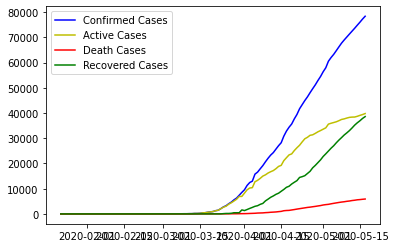

The country is: Central African Republic


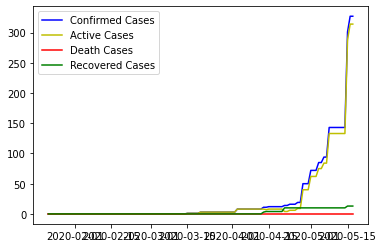

The country is: Chad


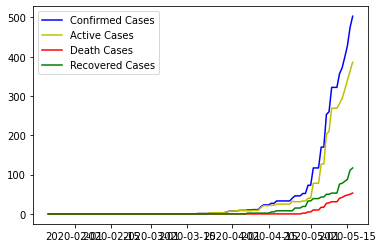

The country is: Chile


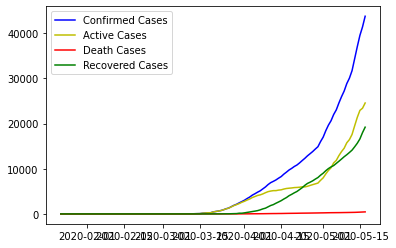

The country is: China


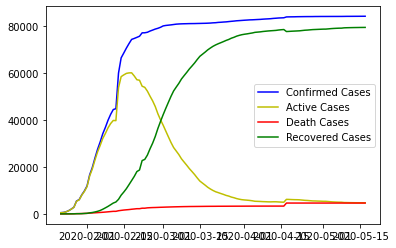

The country is: Colombia


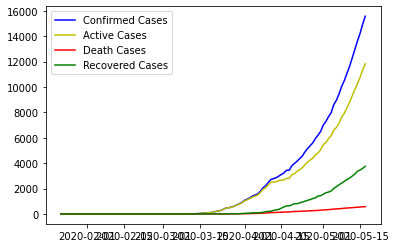

The country is: Comoros


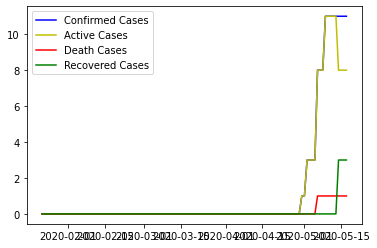

The country is: Costa Rica


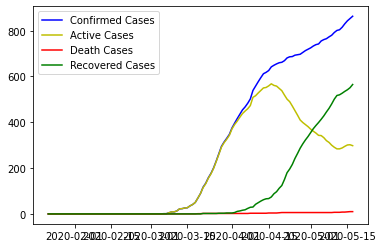

The country is: Cote d'Ivoire


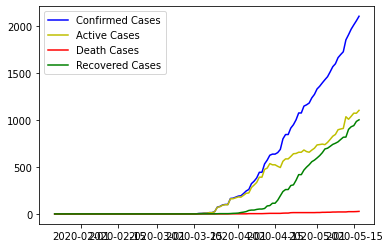

The country is: Croatia


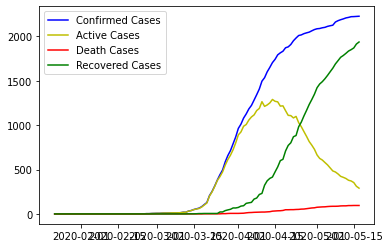

The country is: Cuba


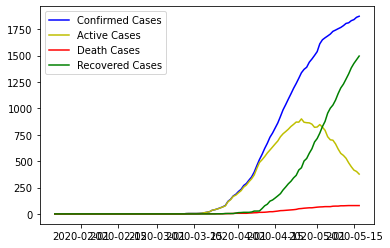

The country is: Cyprus


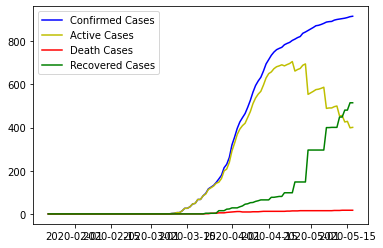

The country is: Czechia


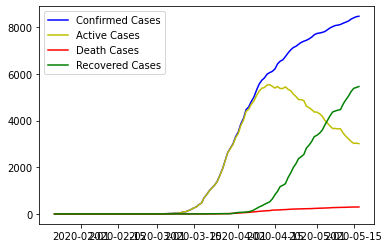

The country is: Democratic Republic of the Congo


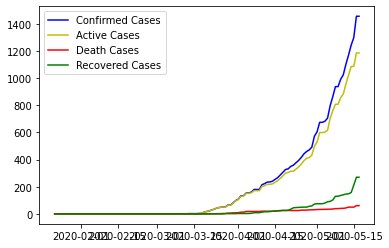

The country is: Denmark


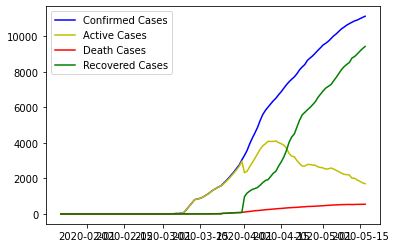

The country is: Diamond Princess


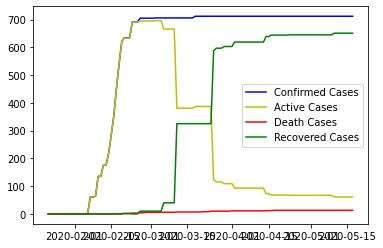

The country is: Djibouti


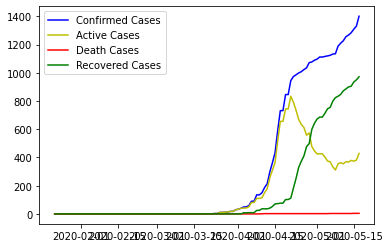

The country is: Dominica


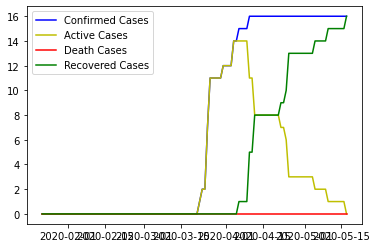

The country is: Dominican Republic


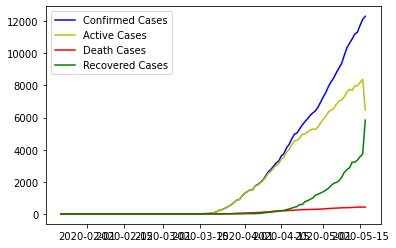

The country is: Ecuador


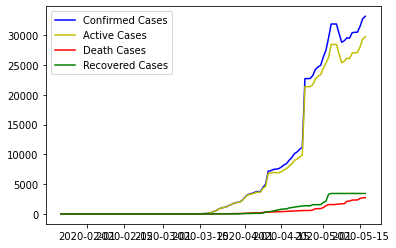

The country is: Egypt


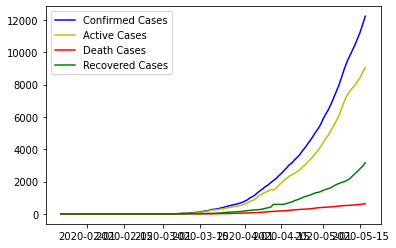

The country is: El Salvador


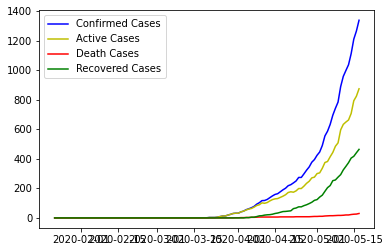

The country is: Equatorial Guinea


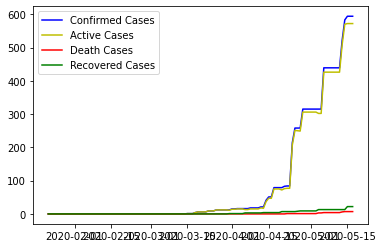

The country is: Eritrea


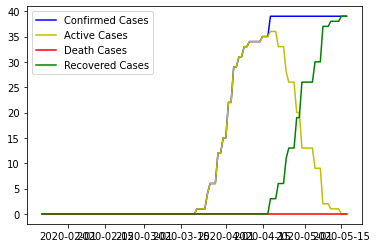

The country is: Estonia


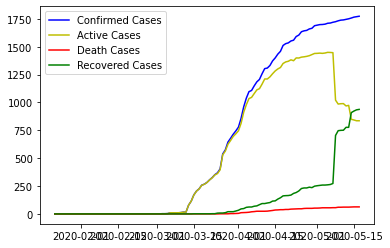

The country is: Eswatini


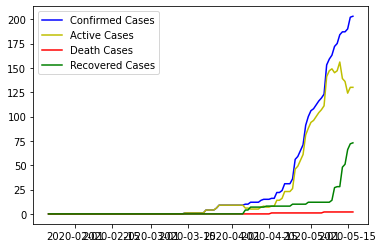

The country is: Ethiopia


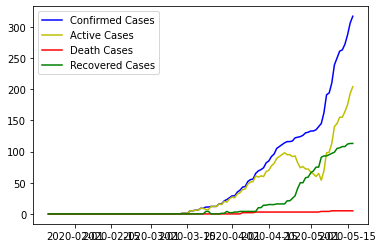

The country is: Fiji


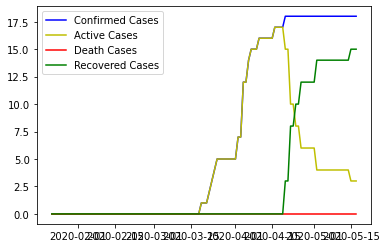

The country is: Finland


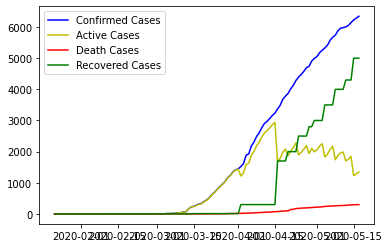

The country is: France


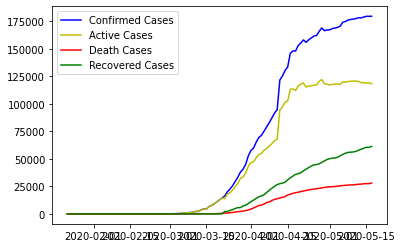

The country is: Gabon


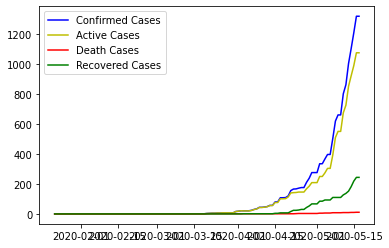

The country is: Gambia


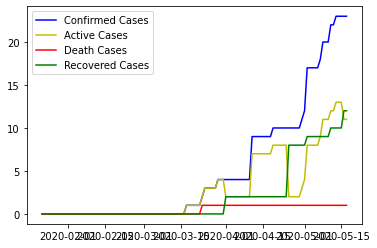

The country is: Georgia


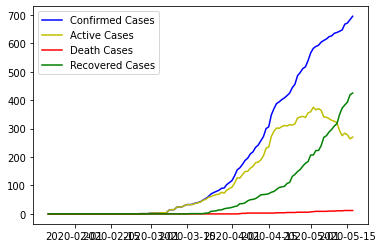

The country is: Germany


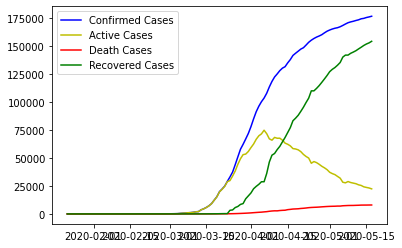

The country is: Ghana


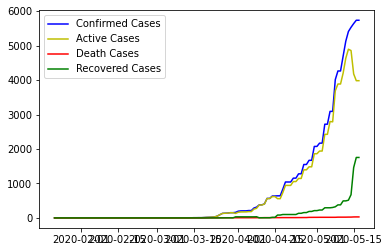

The country is: Greece


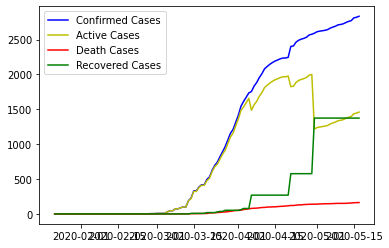

The country is: Grenada


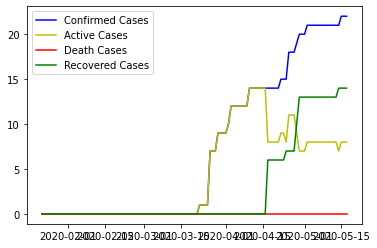

The country is: Guatemala


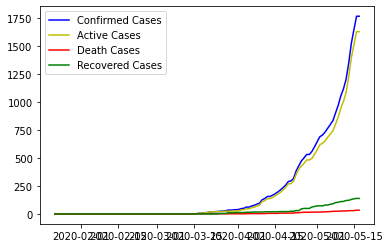

The country is: Guinea


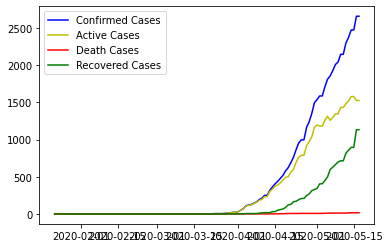

The country is: Guinea-Bissau


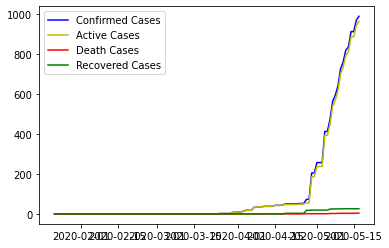

The country is: Guyana


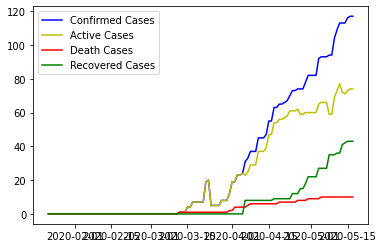

The country is: Haiti


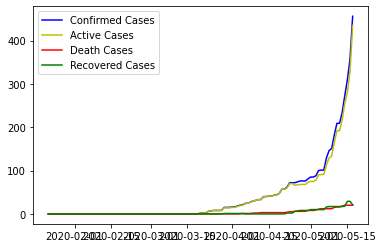

The country is: Holy See


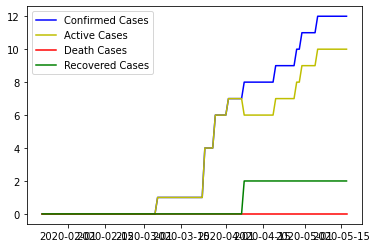

The country is: Honduras


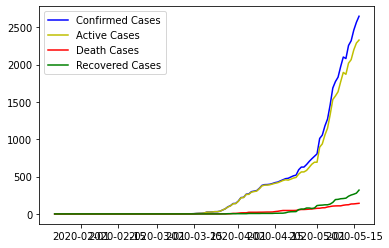

The country is: Hungary


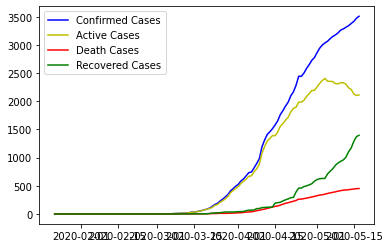

The country is: Iceland


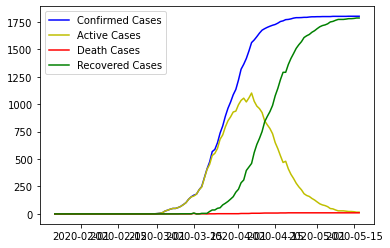

The country is: India


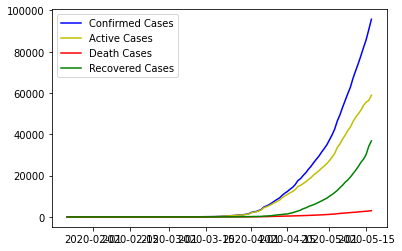

The country is: Indonesia


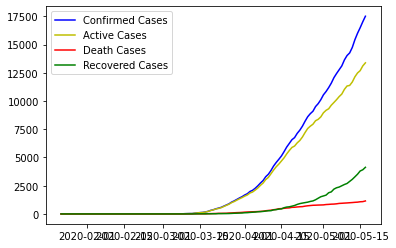

The country is: Iran


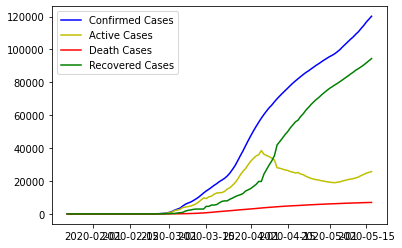

The country is: Iraq


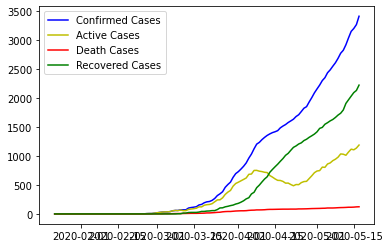

The country is: Ireland


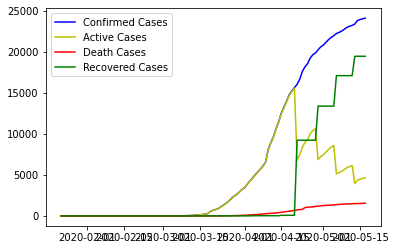

The country is: Israel


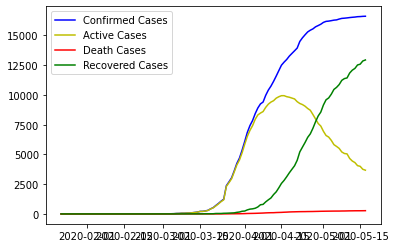

The country is: Italy


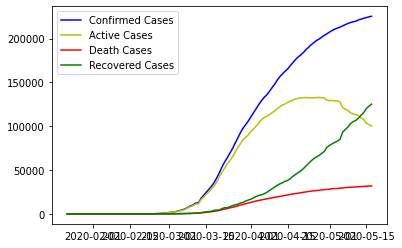

The country is: Jamaica


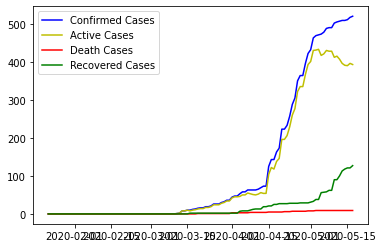

The country is: Japan


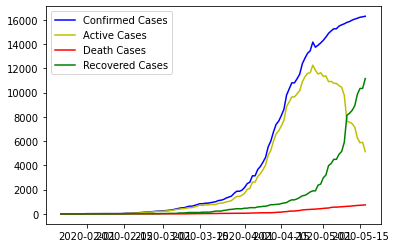

The country is: Jordan


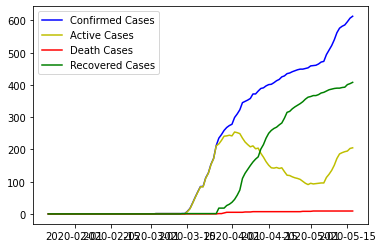

The country is: Kazakhstan


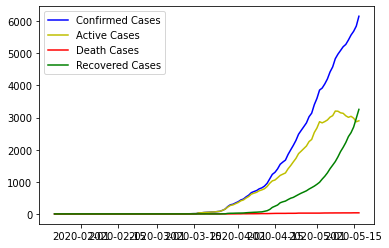

The country is: Kenya


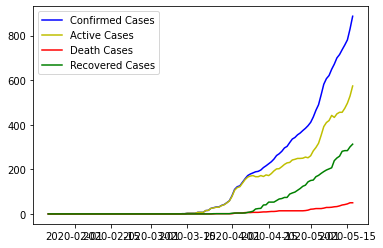

The country is: Korea, South


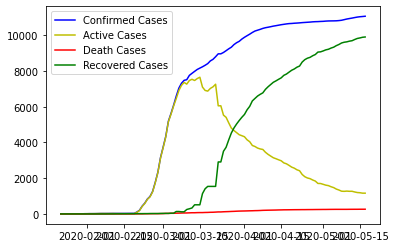

The country is: Kosovo


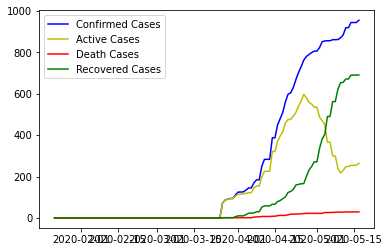

The country is: Kuwait


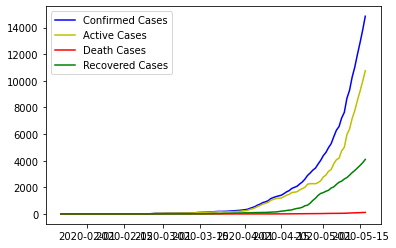

The country is: Kyrgyzstan


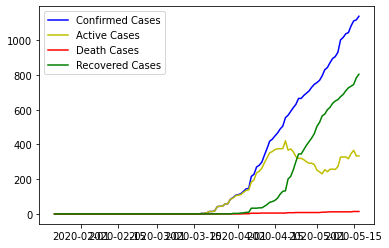

The country is: Laos


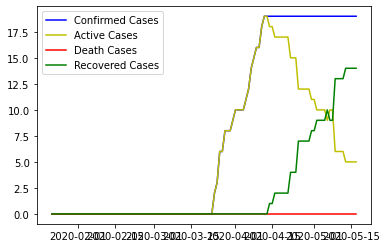

The country is: Latvia


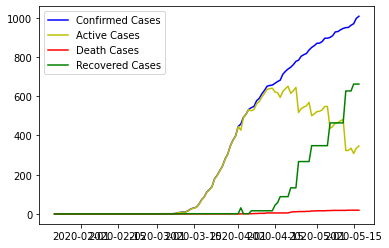

The country is: Lebanon


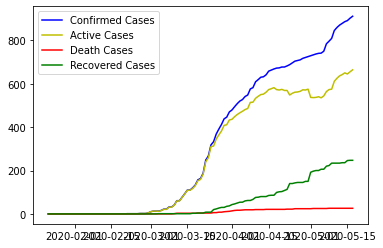

The country is: Lesotho


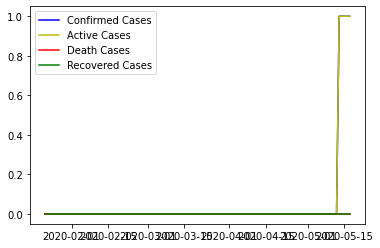

The country is: Liberia


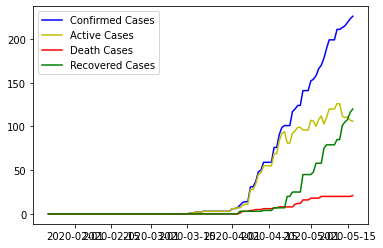

The country is: Libya


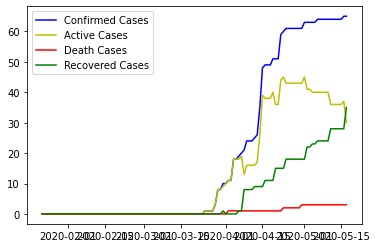

The country is: Liechtenstein


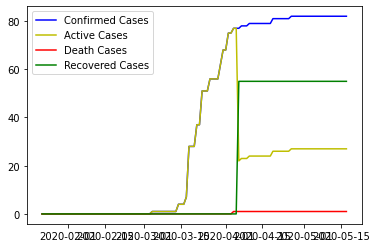

The country is: Lithuania


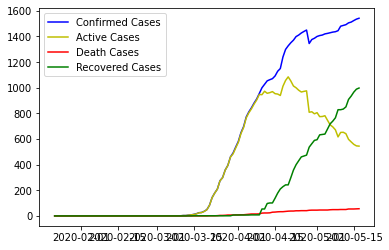

The country is: Luxembourg


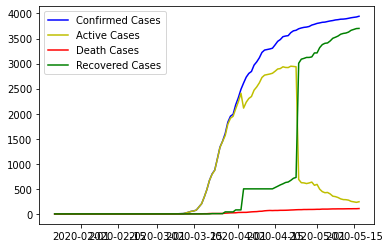

The country is: MS Zaandam


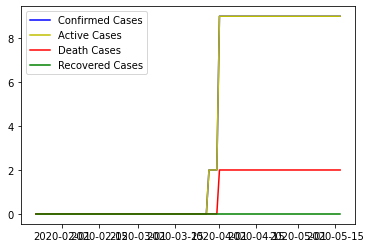

The country is: Madagascar


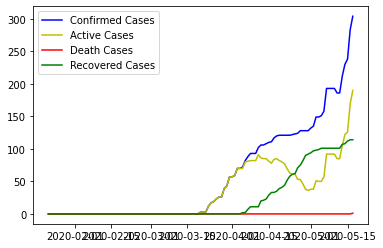

The country is: Malawi


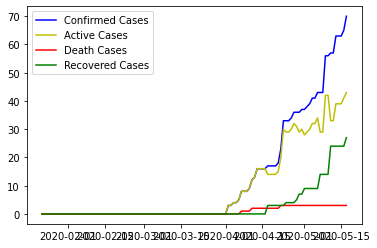

The country is: Malaysia


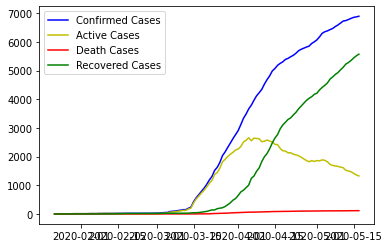

The country is: Maldives


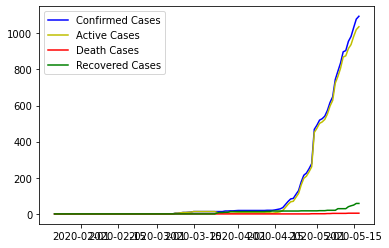

The country is: Mali


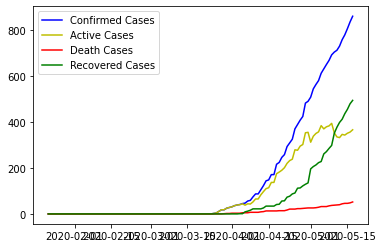

The country is: Malta


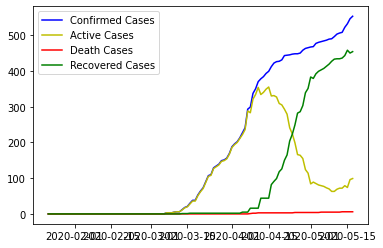

The country is: Mauritania


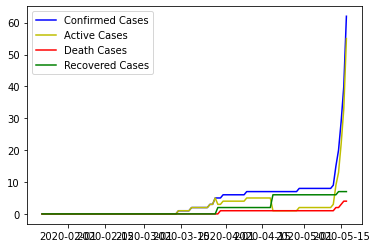

The country is: Mauritius


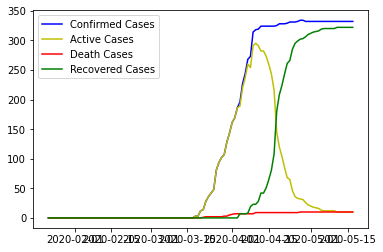

The country is: Mexico


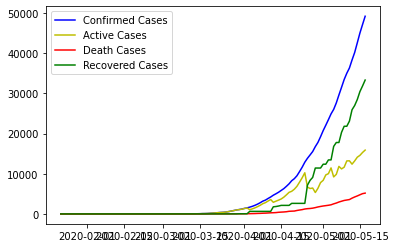

The country is: Moldova


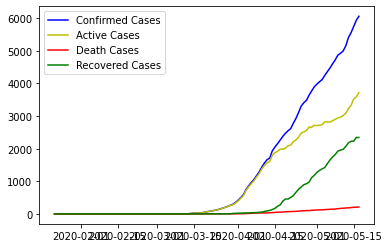

The country is: Monaco


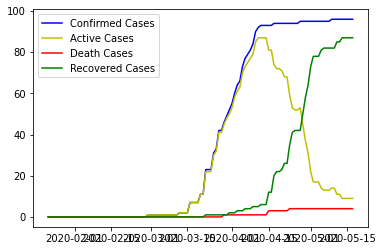

The country is: Mongolia


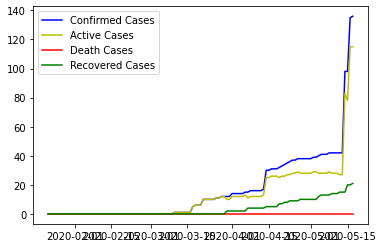

The country is: Montenegro


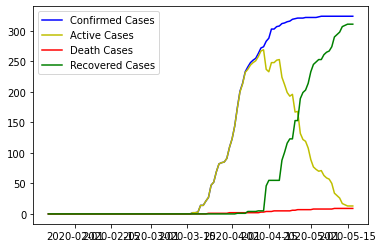

The country is: Morocco


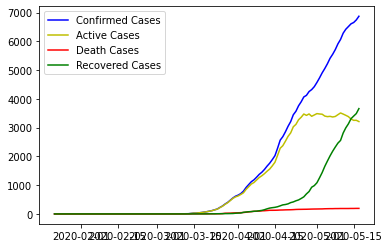

The country is: Mozambique


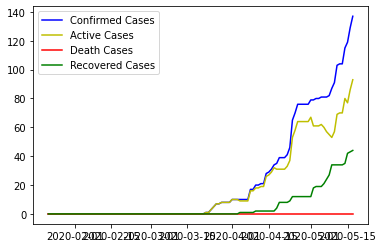

The country is: Namibia


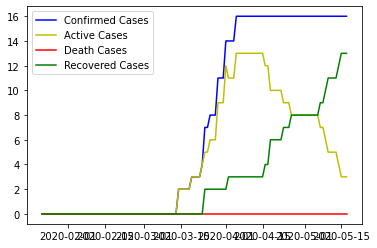

The country is: Nepal


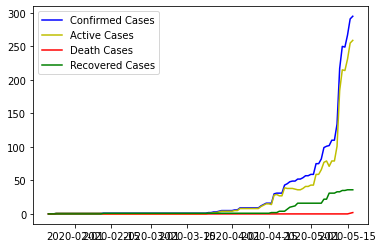

The country is: Netherlands


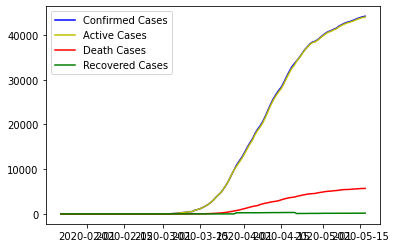

The country is: New Zealand


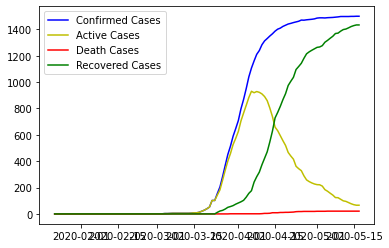

The country is: Nicaragua


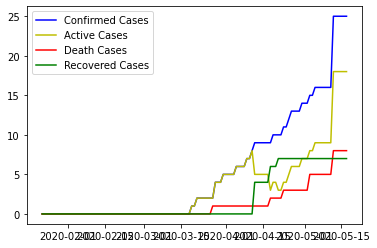

The country is: Niger


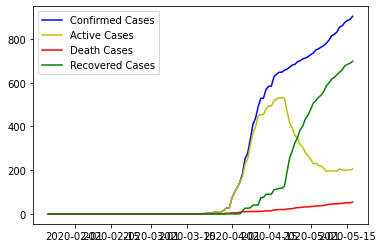

The country is: Nigeria


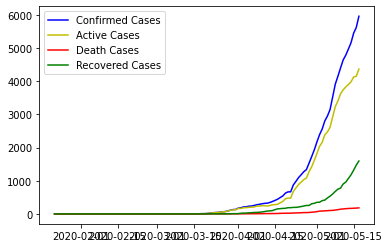

The country is: North Macedonia


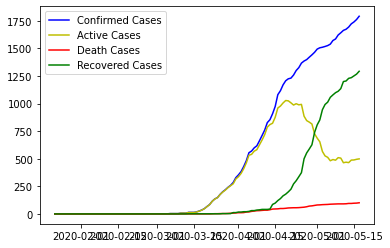

The country is: Norway


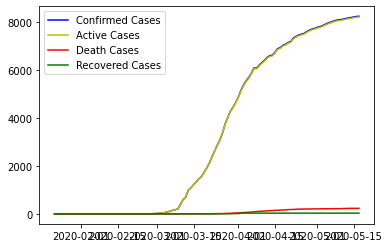

The country is: Oman


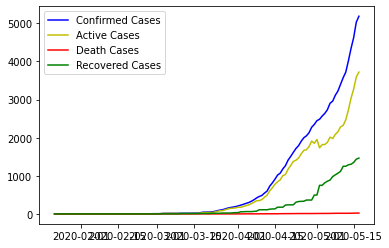

The country is: Pakistan


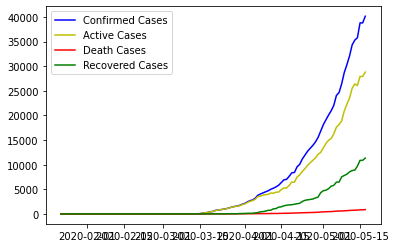

The country is: Panama


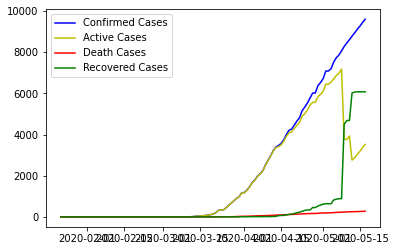

The country is: Papua New Guinea


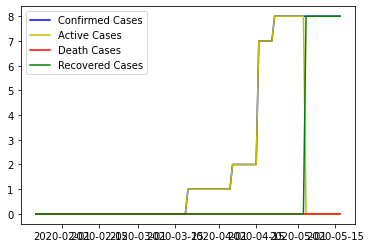

The country is: Paraguay


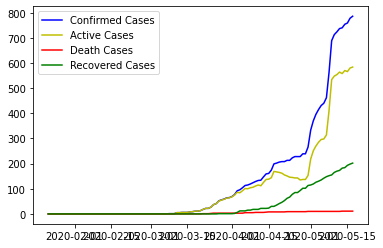

The country is: Peru


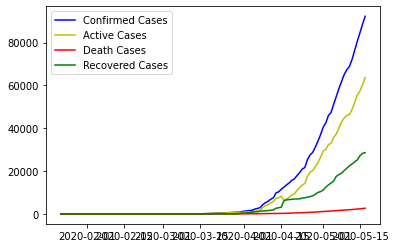

The country is: Philippines


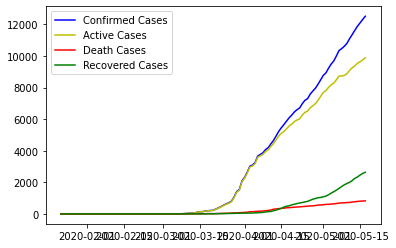

The country is: Poland


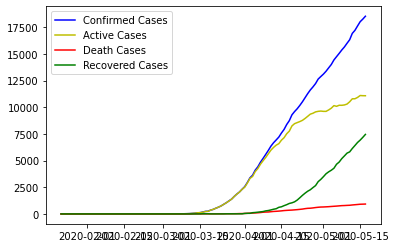

The country is: Portugal


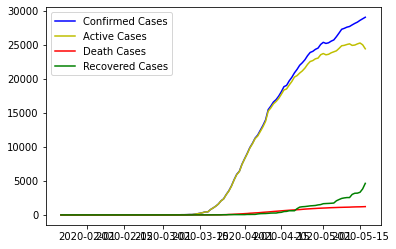

The country is: Qatar


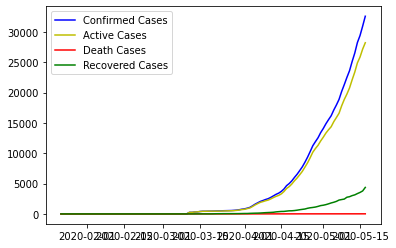

The country is: Republic of the Congo


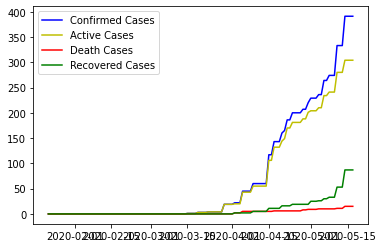

The country is: Romania


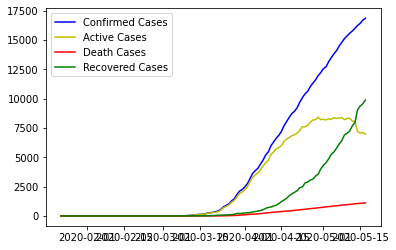

The country is: Russia


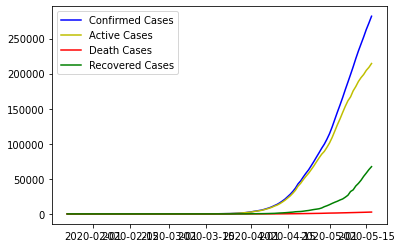

The country is: Rwanda


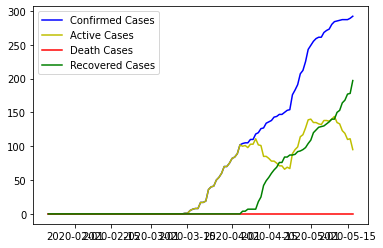

The country is: Saint Kitts and Nevis


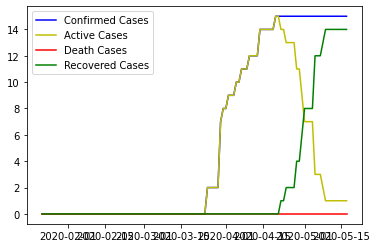

The country is: Saint Lucia


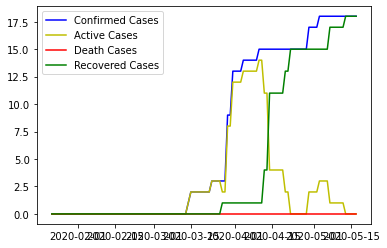

The country is: Saint Vincent and the Grenadines


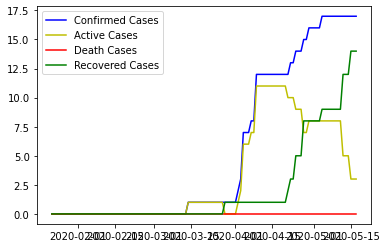

The country is: San Marino


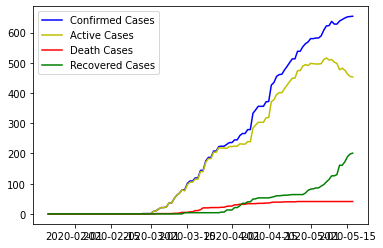

The country is: Sao Tome and Principe


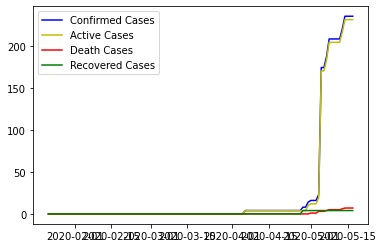

The country is: Saudi Arabia


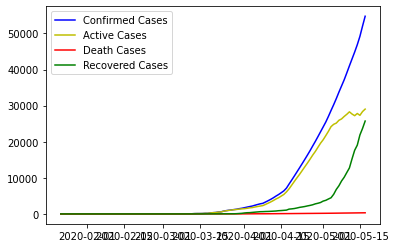

The country is: Senegal


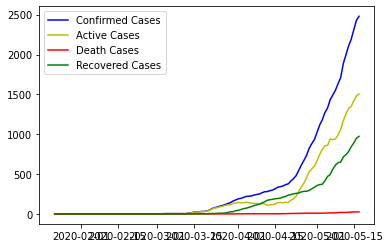

The country is: Serbia


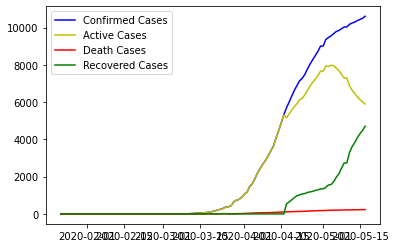

The country is: Seychelles


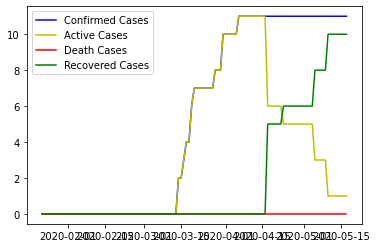

The country is: Sierra Leone


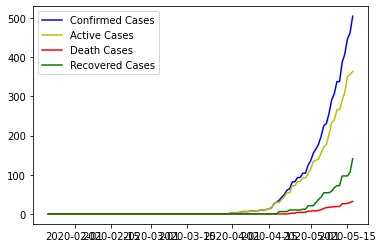

The country is: Singapore


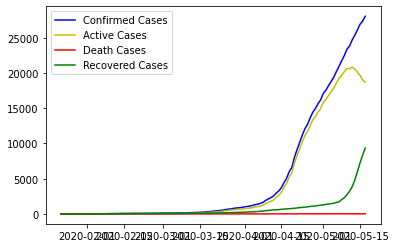

The country is: Slovakia


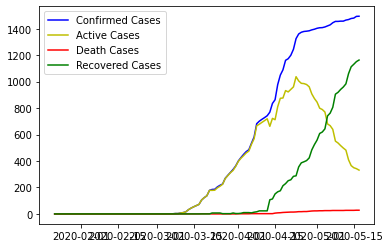

The country is: Slovenia


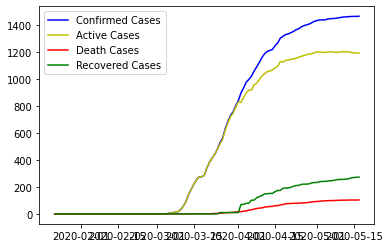

The country is: Somalia


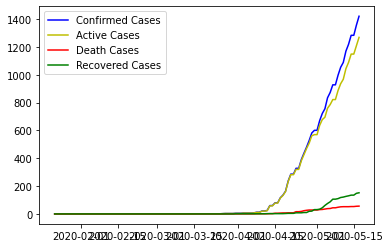

The country is: South Africa


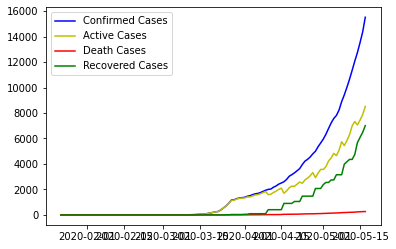

The country is: South Sudan


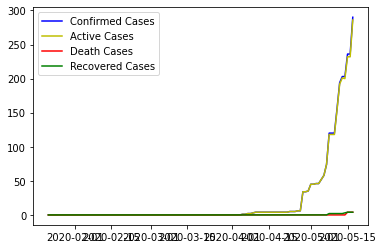

The country is: Spain


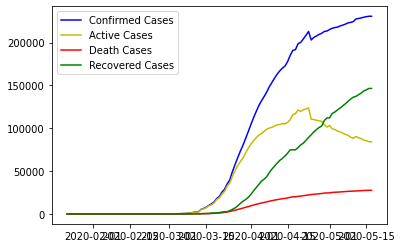

The country is: Sri Lanka


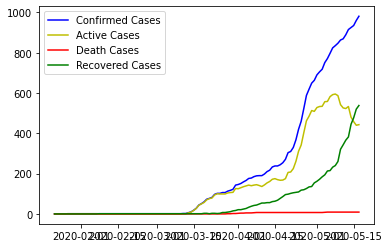

The country is: Sudan


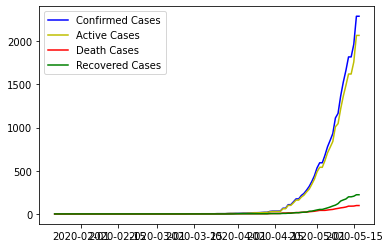

The country is: Suriname


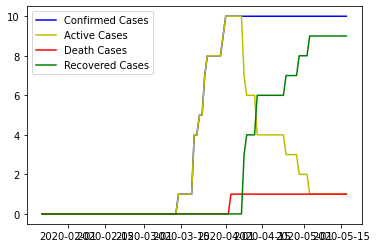

The country is: Sweden


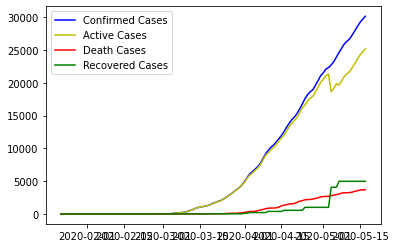

The country is: Switzerland


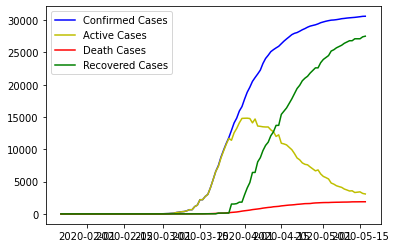

The country is: Syria


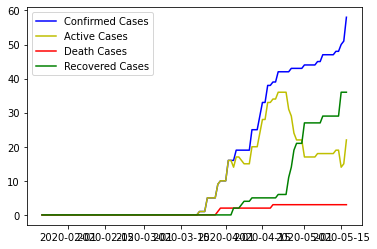

The country is: Taiwan


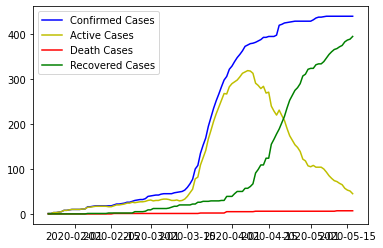

The country is: Tajikistan


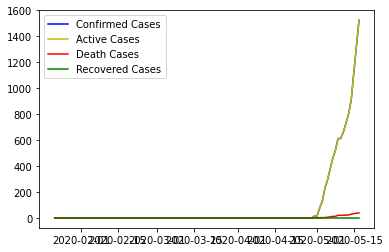

The country is: Tanzania


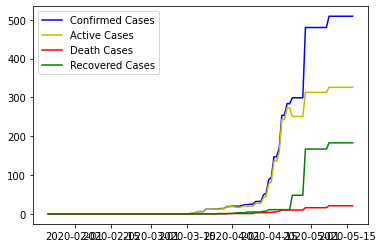

The country is: Thailand


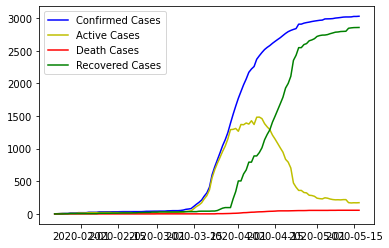

The country is: Timor-Leste


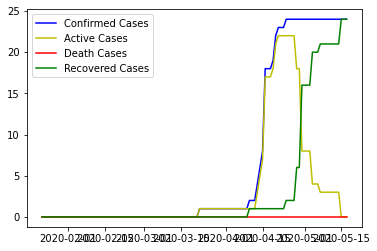

The country is: Togo


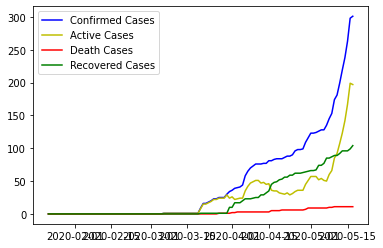

The country is: Trinidad and Tobago


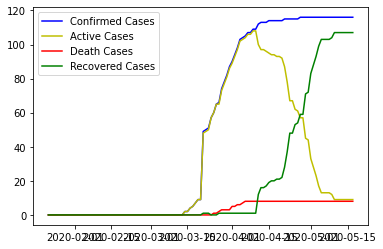

The country is: Tunisia


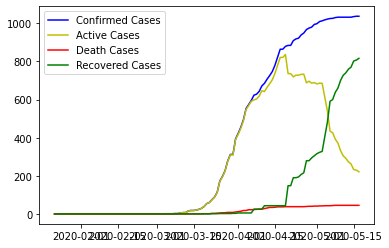

The country is: Turkey


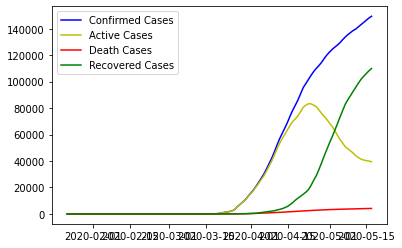

The country is: USA


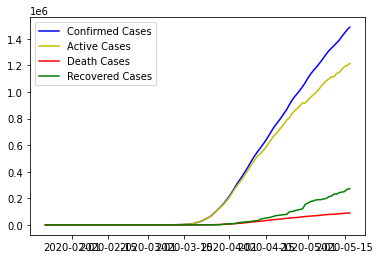

The country is: Uganda


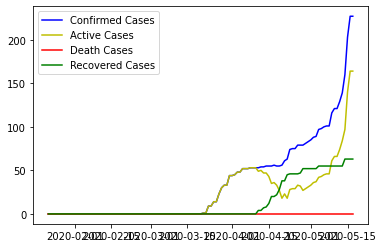

The country is: Ukraine


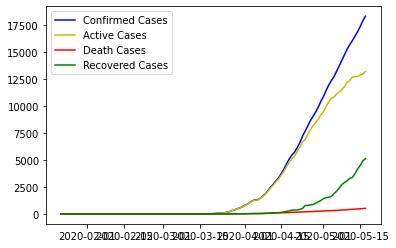

The country is: United Arab Emirates


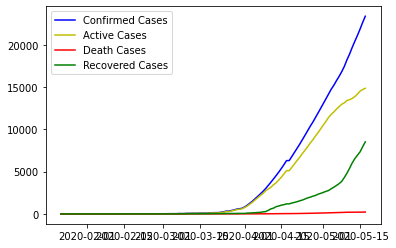

The country is: United Kingdom


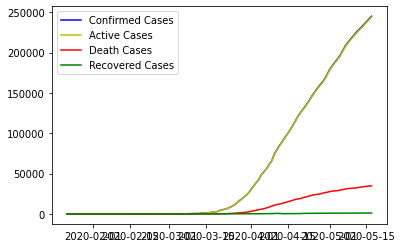

The country is: Uruguay


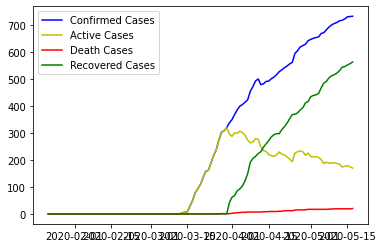

The country is: Uzbekistan


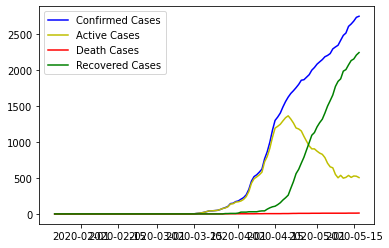

The country is: Venezuela


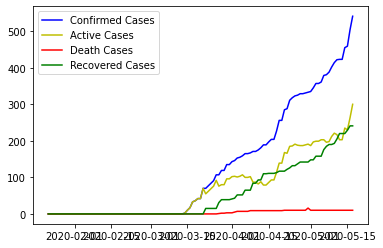

The country is: Vietnam


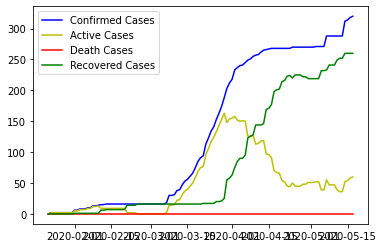

The country is: West Bank and Gaza


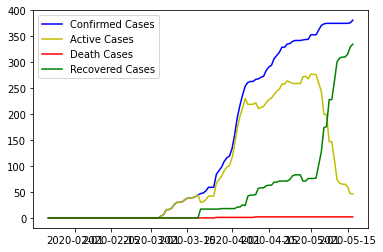

The country is: Western Sahara


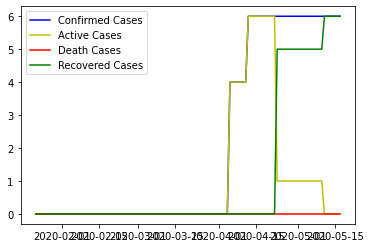

The country is: Yemen


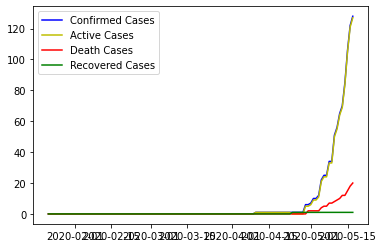

The country is: Zambia


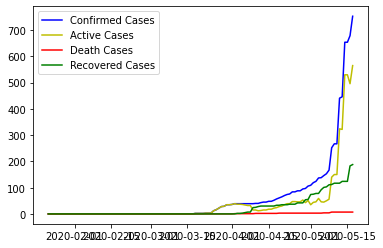

The country is: Zimbabwe


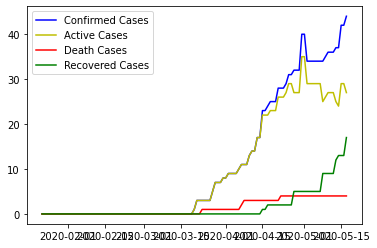

The country is: Global


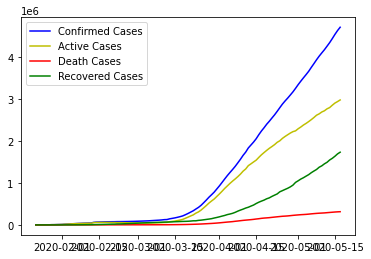

In [18]:
for i in df_confirmed:
  print("The country is:", i)
  plt.figure()
  plt.plot(df_confirmed.index, df_confirmed[i], color = "b", label = "Confirmed Cases");
  plt.plot(df_active.index, df_active[i], color = "y", label = "Active Cases");
  plt.plot(df_death.index, df_death[i], color = "r", label = "Death Cases");
  plt.plot(df_recovered.index, df_recovered[i], color = "g", label = "Recovered Cases");
  plt.legend(loc = "best")
  plt.show()